In [11]:
import pandas as pd
from matplotlib import pyplot as plt
# import seaborn as sns
import numpy as np
from datasets import load_dataset, Dataset
from ast import literal_eval

# sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
df = pd.read_csv('data.csv')
df.head()
df.columns
# [print(x) for x in df.Body.head()]
### Exploratory Data Analysis

df.info()
#### !!! Body column contains null values !!!
### Drop null values
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      3988 non-null   object
 1   Headline  3988 non-null   object
 2   Body      3988 non-null   object
 3   Label     3988 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 155.8+ KB


### Fake vs Real news distribution

### Fake news are labelled 0
### Real news are labelled 1

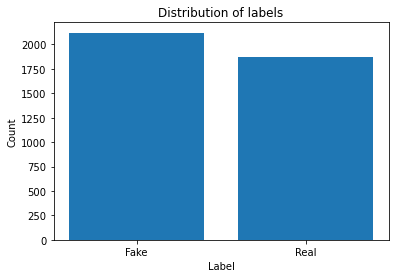

In [12]:
labels_distribution = df.Label.value_counts()
plt.bar(labels_distribution.index, labels_distribution.values)
plt.title('Distribution of labels')
plt.xticks(labels_distribution.index, ['Fake', 'Real'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Fake/Real distribution is balanced

In [13]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [14]:
### Count the number of fake and real news for each website
# df['domain'] =

df['domain'] = df.URLs.apply(
    lambda x: x.split('http://')[1].split('/')[0].replace('www.', '') if 'http://' in x else x.split('https://')[1].split('/')[0].replace('www.', '') if 'https://' in x else None)
# df.head()

In [15]:
df

,URLs,Headline,Body,Label,domain
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,bbc.com
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,reuters.com
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,nytimes.com
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,reuters.com
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,cnn.com
...,...,...,...,...,...
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0,beforeitsnews.com
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0,beforeitsnews.com
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,beforeitsnews.com
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1,reuters.com


In [16]:
fake_news = df.groupby(['domain', 'Label'], as_index=False).value_counts()[['domain', 'Label']].value_counts()[:, 0]
real_news = df.groupby(['domain', 'Label'], as_index=False).value_counts()[['domain', 'Label']].value_counts()[:, 1]

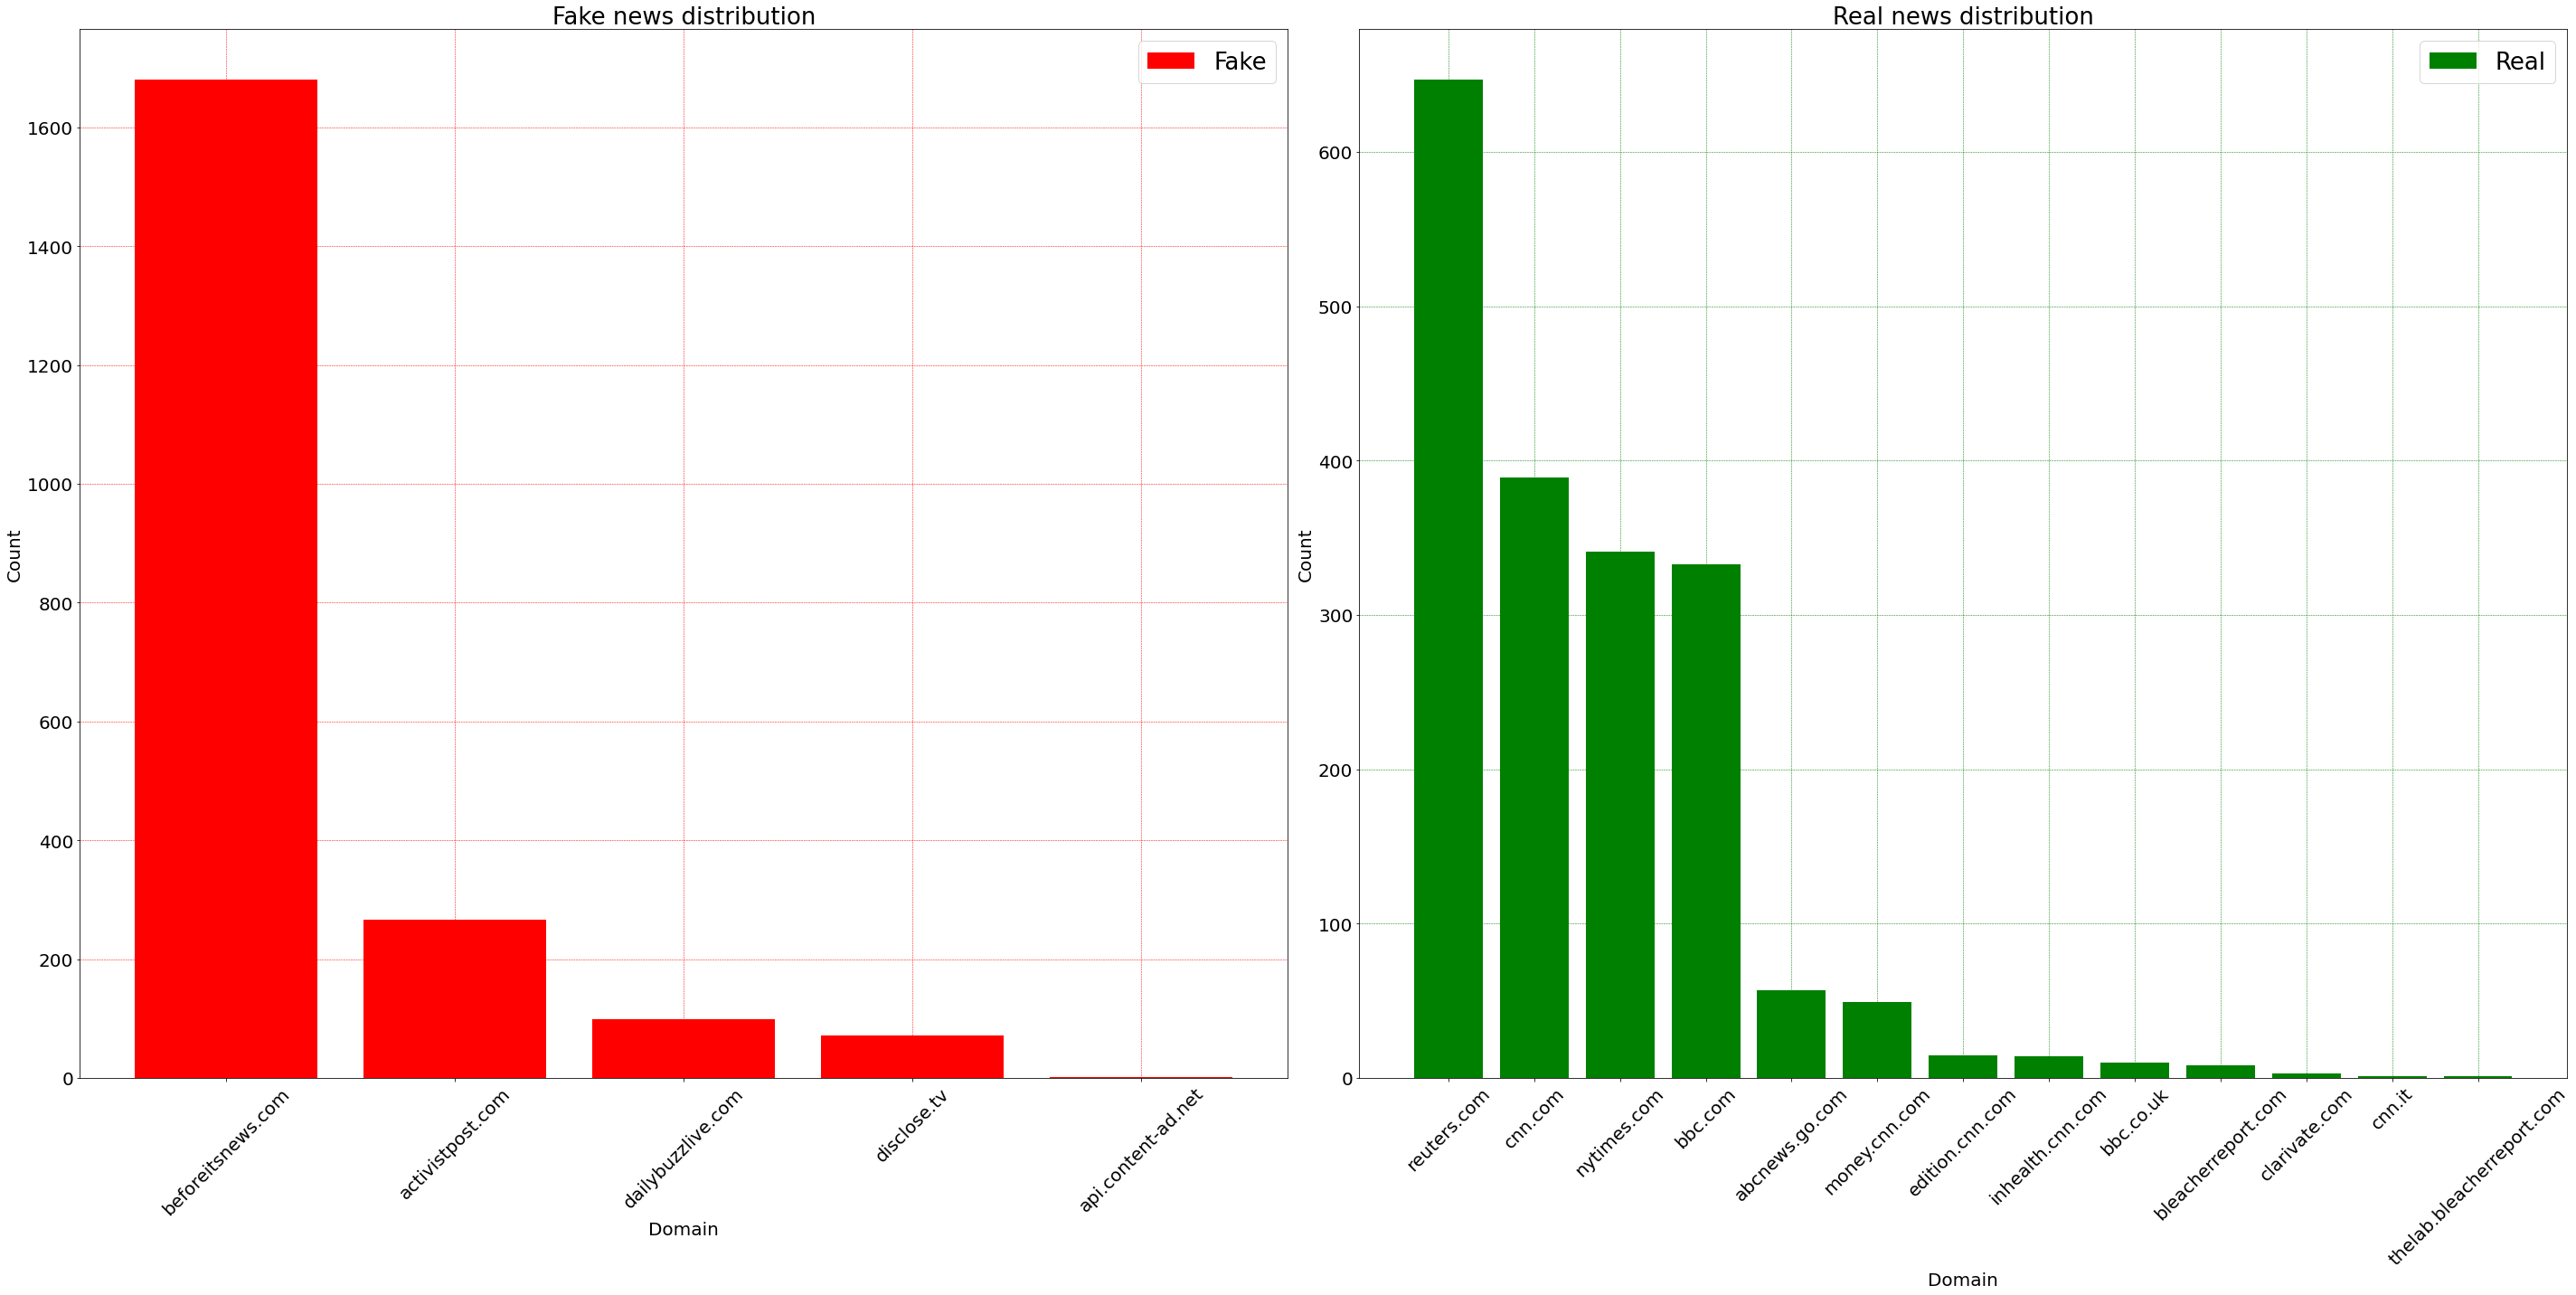

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(40, 20))
ax[0].bar(fake_news.index, fake_news.values, color='red', label='Fake')
ax[1].bar(real_news.index, real_news.values, color='green', label='Real')
# set title
ax[0].set_title('Fake news distribution',  fontsize=26)
ax[1].set_title('Real news distribution',  fontsize=26)
# set x-axis label
ax[0].set_xlabel('Domain',  fontsize=20)
ax[0].tick_params(axis='x', rotation=45, which='major', labelsize=20)
ax[0].tick_params(axis='y', which='major', labelsize=20)

ax[1].set_xlabel('Domain',  fontsize=20)
ax[1].tick_params(axis='x', rotation=45, which='major', labelsize=20)
ax[1].tick_params(axis='y', which='major', labelsize=20)

# set y-axis label
ax[0].set_ylabel('Count', fontsize=20)
ax[1].set_ylabel('Count', fontsize=20)
# set legend
ax[0].legend(fontsize=26)
ax[1].legend(fontsize=26)
# show plot
# plt.show()
plt.tight_layout()

ax[0].grid(color = 'red', linestyle = '--', linewidth = 0.5)
ax[1].grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.savefig('fake-news-distribution-website.png')
# plt.bar(fake_news.index, fake_news.values)
# plt.title('Distribution of fake news')
# # rotate xticks

#
# plt.xlabel('News source')

### What is the size of the news

In [18]:
# Count the number of words in each news
df['word_count'] = df.Body.apply(lambda x: len(x.split()))


### How much are they lying?

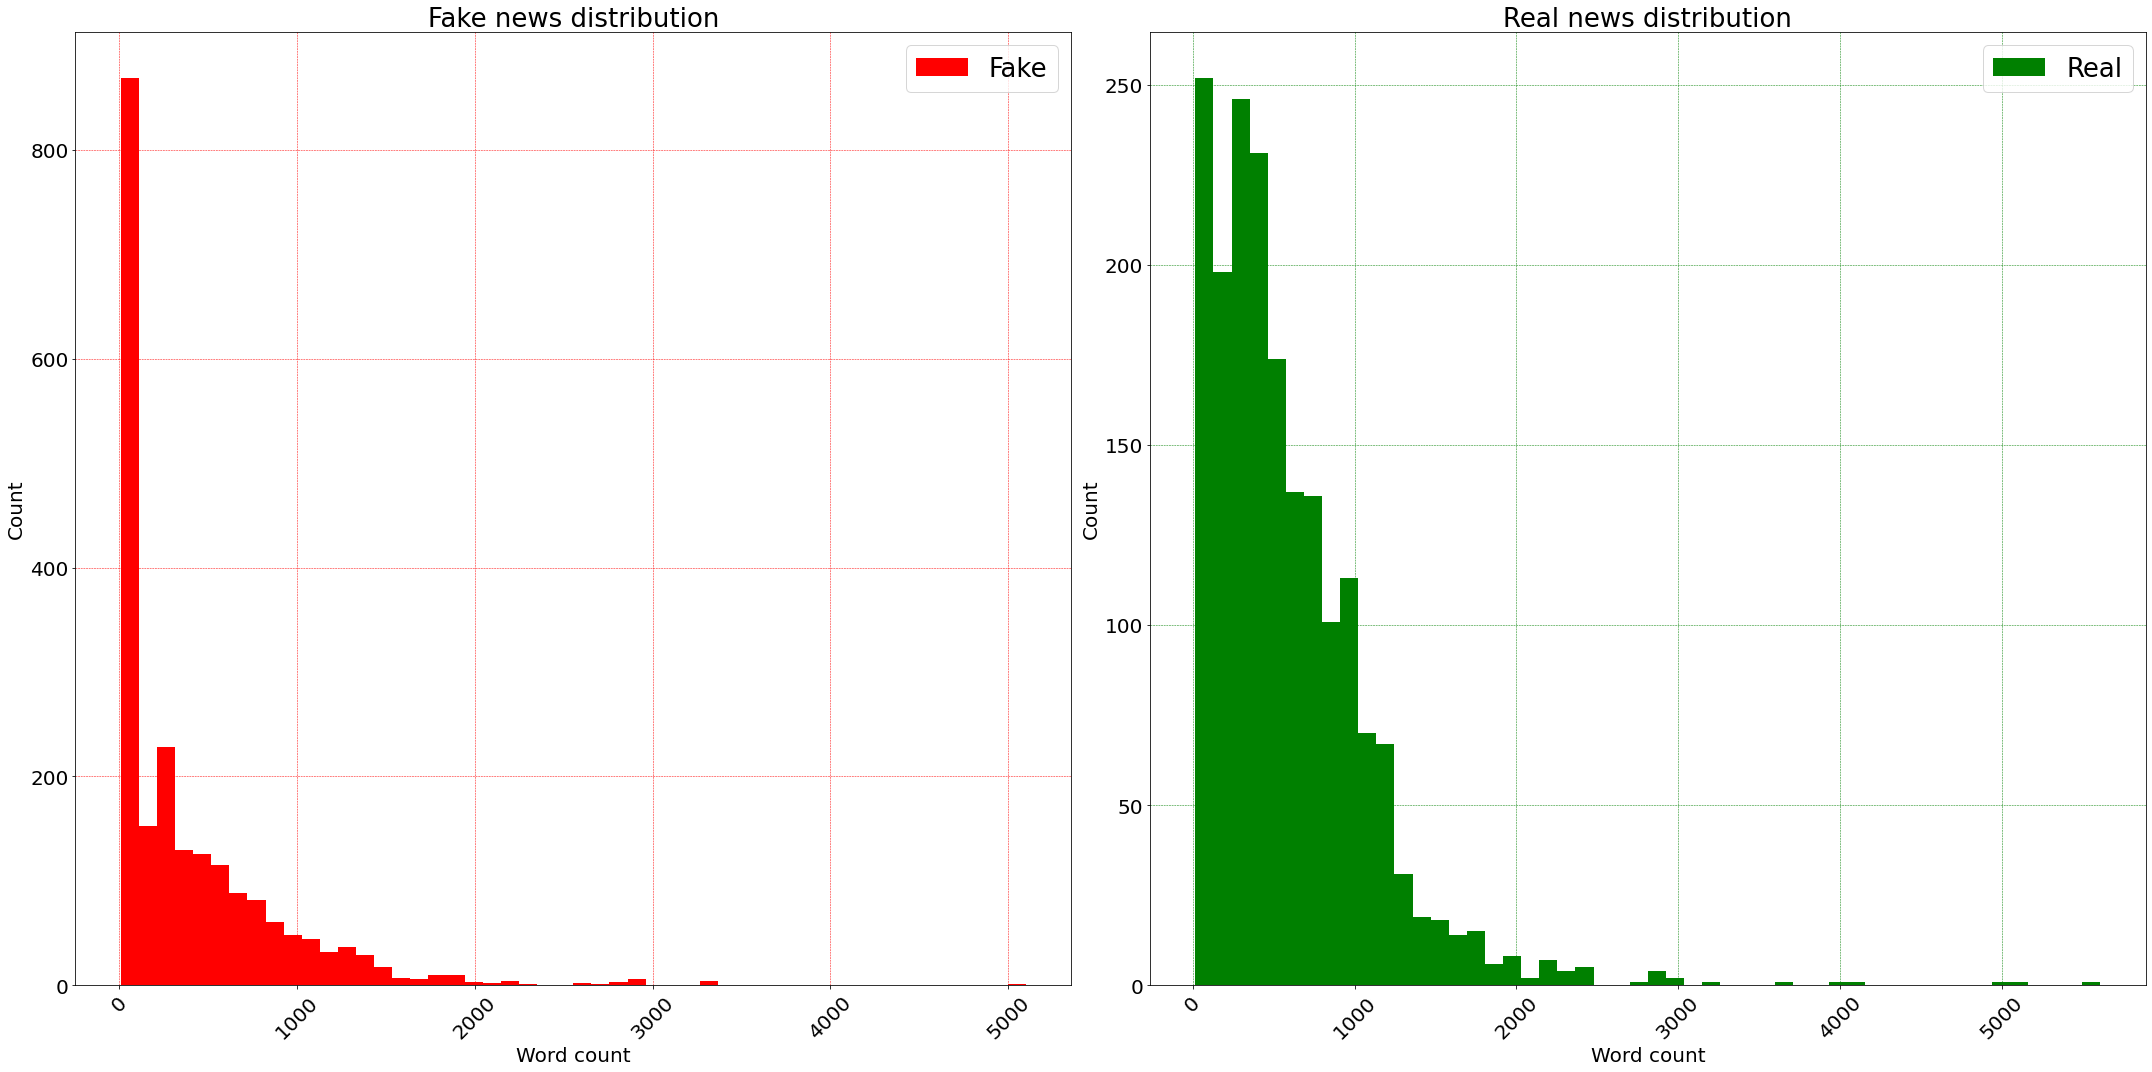

In [19]:
# Show plot of word count distribution for real and fake news
fig, ax = plt.subplots(1, 2, figsize=(30, 15))
ax[0].hist(df[df.Label == 0].word_count, bins=50, color='red', label='Fake')
ax[1].hist(df[df.Label == 1].word_count, bins=50, color='green', label='Real')
# set title
ax[0].set_title('Fake news distribution', fontsize=26)
ax[1].set_title('Real news distribution', fontsize=26)
# set x-axis label
ax[0].set_xlabel('Word count', fontsize=20)
ax[0].tick_params(axis='x', rotation=45, which='major', labelsize=20)
ax[0].tick_params(axis='y', which='major', labelsize=20)

ax[1].set_xlabel('Word count', fontsize=20)
ax[1].tick_params(axis='x', rotation=45, which='major', labelsize=20)
ax[1].tick_params(axis='y', which='major', labelsize=20)

# set y-axis label
ax[0].set_ylabel('Count', fontsize=20)
ax[1].set_ylabel('Count', fontsize=20)
# set legend
ax[0].legend(fontsize=26)
ax[1].legend(fontsize=26)

ax[0].grid(color = 'red', linestyle = '--', linewidth = 0.5)
ax[1].grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.tight_layout()

# show plot
# plt.show()
plt.savefig('word-count-distribution-website.png')

## Topic modeling

In [20]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

docs = df.Body.tolist()
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [21]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [22]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.3)

In [23]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [24]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 13828
Number of documents: 3988


In [25]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [26]:
top_topics = model.top_topics(corpus)#, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.8232.
[([(0.014069283, 'game'),
   (0.01032592, 'season'),
   (0.009107696, 'team'),
   (0.0054307003, 'player'),
   (0.0053861076, 'him'),
   (0.0046498342, 'do'),
   (0.0045765033, 'going'),
   (0.0043346747, 'make'),
   (0.0043225004, 'back'),
   (0.0043213544, 'good'),
   (0.0042972215, 'run'),
   (0.0042030904, 'win'),
   (0.00403815, 'off'),
   (0.003810987, 're'),
   (0.0037855, 'play'),
   (0.0036945818, 'go'),
   (0.003680418, 'me'),
   (0.0036172348, 'thing'),
   (0.0036002106, 'fan'),
   (0.0035545067, 'against')],
  -0.9626796828457413),
 ([(0.007870398, 'her'),
   (0.0072560413, 'she'),
   (0.005698881, 'image'),
   (0.005647225, 'my'),
   (0.004605948, 'people'),
   (0.0038032997, 'how'),
   (0.0036959148, 'work'),
   (0.0035089115, 'family'),
   (0.0034951356, 'our'),
   (0.0033461233, 'life'),
   (0.003266647, 'world'),
   (0.0030562747, 'most'),
   (0.0030448677, 'many'),
   (0.0028500932, 'com'),
   (0.0027306317, 'music'),
   (0.0026907984

### Topic modelling using scikit learn

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

documents = df.Body.tolist()
count = CountVectorizer(stop_words='english', max_df=.1, max_features=10000)
X = count.fit_transform(documents)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=20,
            random_state=1996, learning_method='batch')
X_topics = lda.fit_transform(X)

In [37]:
n_top_words = 5
feature_names = count.get_feature_names()
top_5_topics = []
str_topics = ''
for topic_idx, topic in enumerate(lda.components_):
  print("Topic %d:" % (topic_idx + 1))
  print(" ".join([feature_names[i]
  for i in topic.argsort()
    [:-n_top_words - 1:-1]]))
  str_topics += "\n" + " ".join([feature_names[i]
  for i in topic.argsort()
    [:-n_top_words - 1:-1]])

  top_5_topics.append(" ".join([feature_names[i]
  for i in topic.argsort()
    [:-n_top_words - 1:-1]]))


Topic 1:
data smart information federal privacy
Topic 2:
rate hr rbi runs ip
Topic 3:
ad site links friendly trick
Topic 4:
california caption league wildfires cup
Topic 5:
percent water market billion oil
Topic 6:
hamilton car uber race cdc
Topic 7:
mr reading newsletter advertisement ms
Topic 8:
independence catalonia catalan spain spanish
Topic 9:
nfl anthem conservativedailynews music film
Topic 10:
photos paddock vegas las shooting
Topic 11:
weinstein party election cubs vote
Topic 12:
cup russia england australia qualifying
Topic 13:
korea military war security korean
Topic 14:
deal iran european eu trade
Topic 15:
image dr earth health study
Topic 16:
women school men children rights
Topic 17:
ravens jets steelers pass yards
Topic 18:
yards vs bay td fantasy
Topic 19:
china university japan research patents
Topic 20:
happen list acc chance blue


/home/fefy/anaconda3/envs/env_base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
print(str_topics)


data smart information federal privacy
rate hr rbi runs ip
ad site links friendly trick
california caption league wildfires cup
percent water market billion oil
hamilton car uber race cdc
mr reading newsletter advertisement ms
independence catalonia catalan spain spanish
nfl anthem conservativedailynews music film
photos paddock vegas las shooting
weinstein party election cubs vote
cup russia england australia qualifying
korea military war security korean
deal iran european eu trade
image dr earth health study
women school men children rights
ravens jets steelers pass yards
yards vs bay td fantasy
china university japan research patents
happen list acc chance blue


In [42]:
# Search for news containing the topic 1
words_in_topic = top_5_topics[19].split(' ')
no_of_fake_news = 3
no_of_real_news = 3
fake_news_topics = []
real_news_topics = []

for i, body in enumerate(df.Body):
    if sum([1 for word in words_in_topic if word in body]) > 2:
        if df.Label[i] == 0:
            fake_news_topics.append(body)
        else:
            real_news_topics.append(body)
        if len(real_news_topics) == no_of_real_news and len(fake_news_topics) == no_of_fake_news:
            break
        print('\n\nTopic words: ', words_in_topic)
        print(df.Body[i][:300] + '...')



Topic words:  ['happen', 'list', 'acc', 'chance', 'blue']
The statement, which was read by her lawyer, Matthew Lombard, came on the same day that a law enforcement official said she was questioned by F.B.I. agents trying to determine a motive for the deadly shooting.
It is not clear what, if anything, she knew about Mr. Paddock’s methodical plans to stockp...


Topic words:  ['happen', 'list', 'acc', 'chance', 'blue']
LONDON (Reuters) - A tough line from President Donald Trump has been met by a show of unity from both sides of Iran’s political divide, uniting hardliners who cast the United States as an implacable enemy with pragmatists who seek rapprochement with the West.
Iran, which has kept up a steady drumbea...


Topic words:  ['happen', 'list', 'acc', 'chance', 'blue']
(CNN) — From pilots to travel photographers, train aficionados to tour guides, these globe-trotting experts have seen the world.
They share their favorite destinations, and why they think they shouldn't be missed

KeyError: 981

In [31]:
# Check topics for Real News vs Fake News
for i in range(3):
    print('\n\nTopic words: ', top_5_topics[0])
    print('Real news')
    print(real_news_topics[i][:300] + '...')
    print('Fake news')
    print(fake_news_topics[i][:300] + '...')




Topic words:  data smart information federal privacy
Real news
(CNN) One was a man who died shielding his wife from gunfire on their wedding anniversary. Another was a city of Las Vegas employee who died in his boyfriend's arms. And two others were a veteran corrections officer and his girlfriend who died on the trip they had planned for weeks.
At least 58 peop...
Fake news
By Catherine J. Frompovich
 
According to news reports [1], Pennsylvania Attorney General Josh Shapiro is concerned about and investigating the credit bureau Equifax’s data breach affecting some 143 to 145 million Americans.
 
“People who believe they are an identity theft victim can contact the con...


Topic words:  data smart information federal privacy
Real news
By James Holbrooks
Through a trio of search warrants, the Department of Justice (DoJ) is demanding Facebook hand over the personal information of potentially 6,000 of its users, it was revealed Thursday.
According to CNN, which obtained court documents

### Topic modelling for Fake News

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

fake_news_body = df.loc[df.Label == 0].Body.tolist()
real_news_body = df.loc[df.Label == 1].Body.tolist()

count = CountVectorizer(stop_words='english', max_df=.1, max_features=10000)
X = count.fit_transform(real_news_body)

lda = LatentDirichletAllocation(n_components=20,
                                random_state=1996, learning_method='batch')
X_topics = lda.fit_transform(X)
n_top_words = 5
feature_names = count.get_feature_names()
top_5_topics = []
str_topics = ''
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()
                    [:-n_top_words - 1:-1]]))
    str_topics += "\n" + " ".join([feature_names[i]
                                   for i in topic.argsort()
                                   [:-n_top_words - 1:-1]])

    top_5_topics.append(" ".join([feature_names[i]
                                  for i in topic.argsort()
                                  [:-n_top_words - 1:-1]]))

Topic 1:
forces al islamic men girls
Topic 2:
car hamilton russian storm museum
Topic 3:
puerto rico island eminem hurricane
Topic 4:
tax japan data billion steel
Topic 5:
anthem nfl flag stand pence
Topic 6:
cup brazil russia qualifying wales
Topic 7:
california wildfires photos hide blaze
Topic 8:
independence court catalan catalonia spain
Topic 9:
photos sports hide shot amazing
Topic 10:
china xi chinese beijing japanese
Topic 11:
eu britain immigration secretary brexit
Topic 12:
weinstein sexual allegations harvey film
Topic 13:
series corker yankees republican senate
Topic 14:
iran nuclear patents sanctions agreement
Topic 15:
mexico health oil trade drug
Topic 16:
ms music feel bbc album
Topic 17:
corker texas hurricane harvey photos
Topic 18:
russian russia google committee intelligence
Topic 19:
paddock vegas shooting las gun
Topic 20:
korea korean turkey turkish kim


/home/fefy/anaconda3/envs/env_base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print('\n\nReal news')
print(str_topics)



Real news

forces al islamic men girls
car hamilton russian storm museum
puerto rico island eminem hurricane
tax japan data billion steel
anthem nfl flag stand pence
cup brazil russia qualifying wales
california wildfires photos hide blaze
independence court catalan catalonia spain
photos sports hide shot amazing
china xi chinese beijing japanese
eu britain immigration secretary brexit
weinstein sexual allegations harvey film
series corker yankees republican senate
iran nuclear patents sanctions agreement
mexico health oil trade drug
ms music feel bbc album
corker texas hurricane harvey photos
russian russia google committee intelligence
paddock vegas shooting las gun
korea korean turkey turkish kim
